# The multiple linear regression model

One of the fundamental models of data analysis for numerical variables is the linear regression model. Usually, in introductory statistics courses of an undergraduate course, the linear regression model with one independent variable is discussed. We consider the more general case of the linear regression model with multiple (for us $p$ variables) independent variables:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon =  \boldsymbol{\beta}^T \boldsymbol{x} + \epsilon
$$

with $ \boldsymbol{\beta} = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{pmatrix}$ and $ \boldsymbol{x} = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_p \end{pmatrix}$ 

```{note}
Notation: In introductory statistics courses, we often distinguish between the random variable $Y$ and a realization $y$ by using upper and lower case. To keep the notation as streamlined as possible, we dispense with this convention and infer from the context whether we are dealing with the concept of a random variable or a realization of a variable. In addition, I more often use vector or matrix notation to keep formal representations compact. Bold lowercase letters correspond to vectors, uppercase letters correspond to matrices. 
```

As the name implies, only linear relationships can be captured adequately by the linear regression model. I.e. in case of the simple linear regression the function corresponds to a straight line, with two variables to a plane and in the general case to a so-called hyperplane. It is characteristic for the linear relationship that the increase by one unit of an independent variable always leads to a constant increase of the dependent variable, regardless of which value the independent variable just takes in its value range. For example, the sales $y$ of a company always increase by $\beta x $, regardless of whether $x$ is a small value or a large value. 

Nevertheless, by choosing the parameters $\boldsymbol{\beta}$ the model can be calibrated. In the lower cell we see the influence of the constant $\beta_0$, by which there is a paralell shift of the line in the simple regression model. In addition, the slope of the straight line can be manipulated by the choice of $\beta_1$. The latter is true for continuous or ordinal independent variables. If $x$ is a categorical variable, the straight line is again shifted parallel up or down. The value of the $\beta_j$ parameters allows conclusions about the possible influence of the respective independent variables. For example, if the value is $0$, then no influence of the respective variable can be assumed. Positive (negative) values, on the other hand, are an indication of a possible relationship. 

The model is only complete with an assumption about the residuals $\epsilon$. Often, $\epsilon$ is assumed to follow a normal distribution. Besides the statistical implications, the inclusion of $\epsilon$ reveals the idea of the model how data is generated. Given, information by $\boldsymbol{x}$ and a functional relationship between these variables $f\left(\boldsymbol{x}\right) = \boldsymbol{\beta}^T \boldsymbol{x}$, we expect a certain level for the value of $y$, i.e., $E(y | \mathbf{x}) = \boldsymbol{\beta}^T \boldsymbol{x}$. This is the deterministic part of the regression model. However, as real life observations usually do not fully a fully deterministic relationship, the deviation $\epsilon = y - \boldsymbol{\beta}^T \boldsymbol{x}$ is ascribed to randomness.  

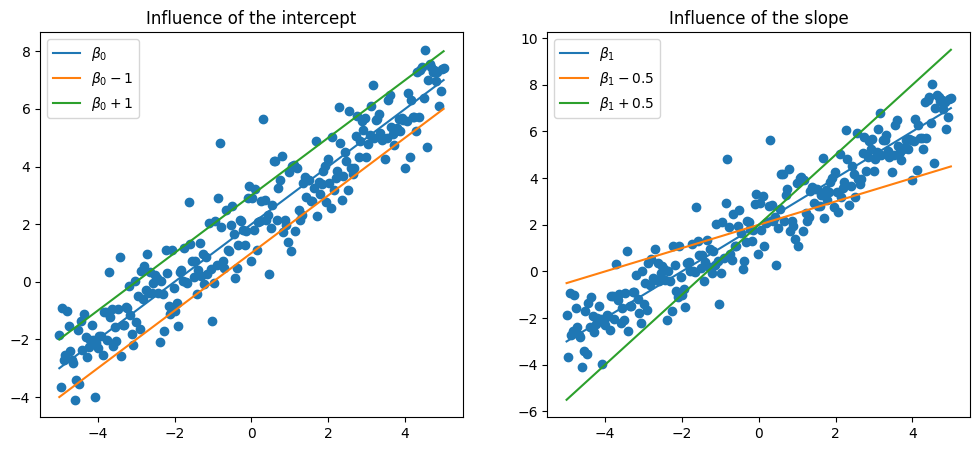

In [1]:
import numpy as np
import matplotlib.pylab as plt

b0 = 2.
b1 = 1.

x1 = np.linspace(-5, 5, 250)
e = np.random.normal(size = 250)

y1 = b0 + b1*x1 + e

fig, axs = plt.subplots(1, 2, figsize = (12, 5))

axs[0].scatter(x1, y1)
axs[0].plot(x1, b0 + b1*x1, label = r"$\beta_0$")
axs[0].plot(x1, b0 - 1. + b1*x1, label = r"$\beta_0 - 1$")
axs[0].plot(x1, b0 + 1. + b1*x1, label = r"$\beta_0 + 1$")
axs[0].legend()
axs[0].set_title("Influence of the intercept")

axs[1].scatter(x1, y1)
axs[1].plot(x1, b0 + b1*x1, label = r"$\beta_1$")
axs[1].plot(x1, b0 + (b1 - 0.5)*x1, label = r"$\beta_1 - 0.5$")
axs[1].plot(x1, b0 + (b1 + 0.5)*x1, label = r"$\beta_1 + 0.5$")
axs[1].legend()
axs[1].set_title("Influence of the slope")
plt.show()

It should be noted that the regression model can also be used to represent non-linear relationships if the variables are transformed in a non-linear way. For example, if we suspect a more quadratic relationship between the $x$ and $y$, we can include $x^2$ in the model. The effect on the functional form of the model can be observed in the next cell. This approach is the polynomial regression, where of course higher polynomials can be included as a function. Here, however, we already deviate from the traditional linear regression model. The polynomial regression is one of several alternatives to the linear regression model, which creates more flexibility by increasing the complexity of the model. However, this is also often associated with challenges that will be discussed later in the course.

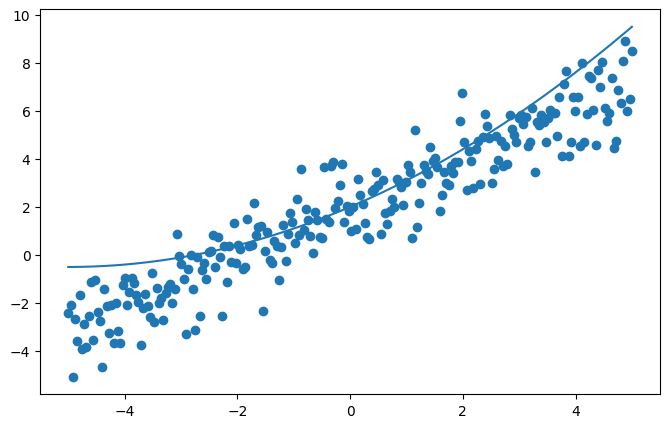

In [2]:
import numpy as np
import matplotlib.pylab as plt

b0 = 2.
b1 = 1.

x1 = np.linspace(-5, 5, 250)
e = np.random.normal(size = 250)

y1 = b0 + b1*x1 + e

fig, axs = plt.subplots(figsize = (8, 5))

axs.scatter(x1, y1)
axs.plot(x1, b0 + b1 * x1 + 0.1*x1**2)
plt.show()

## Training the linear regression model

In the previous section we already briefly mentioned that the values of the parameters $\boldsymbol{\beta}$ are decisive for the interpretation and analysis of possible influences of the independent variables. The important question related to this is what are reasonable values for $\boldsymbol{\beta}$ given the data? Since the model is supposed to represent real life relations as well as possible, the data of a sample are usually used to estimate the model parameters in such a way that the given sample is explained as well as possible by the model. In the best case, a model is obtained in this way that works equally well for new samples. If this succeeds, one can assume that the model is generally suitable to represent the relationships for the task at hand. 

In order to fit a model to given data as well as possible, it is attempted to set the parameters in such a way that the predictions of the model are as close as possible to the real observations. If this succeeds, it can be said that the model explains the occurrence of the data as well as possible. To learn how this process is mastered, we start with a simple (but unrealistic) example. Given an observation $y = 3$ with the observation of an independent variable $x = 2$. Let the equation of the regression line be: 

$$
f(x) = \beta \cdot x 
$$

This is a straight line through the origin of the coordinate system whose slope can be influenced by the choice of $\beta$.

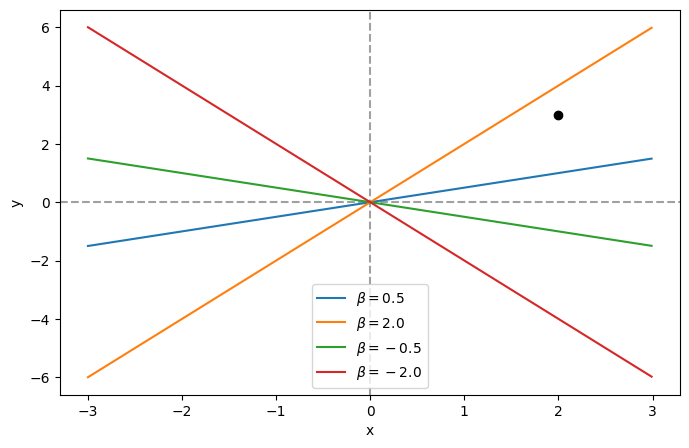

In [3]:
import matplotlib.pylab as plt
import numpy as np


x_range = np.arange(-3, 3, 0.01)
fig, ax = plt.subplots(figsize = (8, 5))
ax.scatter(2, 3, color = "black")
ax.axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
ax.axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
ax.plot(x_range, 0.5 * x_range, label = r"$\beta = 0.5$")
ax.plot(x_range, 2.0 * x_range, label = r"$\beta = 2.0$")
ax.plot(x_range, -0.5 * x_range, label = r"$\beta = -0.5$")
ax.plot(x_range, -2.0 * x_range, label = r"$\beta = -2.0$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In order to check how close the forecast is to the actual value, it makes sense to first determine the difference $y - f(x)$. However, since one is primarily interested in how much the deviation is rather than whether one is just underestimating or overestimating the actual value, the absolute value $|y - f(x)|$ or the squared deviation $\left(y - f(x)\right)^2$ is rather used to quantify how far apart the realization and estimation of the model are. The quadratic deviation if often used due to its useful mathematically properties. Since the estimate of the model depends on the parameter $\beta$, we want to define the cost or loss function:

$$
L\left(y, f_{\beta}(x) \right) = \left(y - f_{\beta}(x)\right)^2
$$

In our example we can directly insert the values:

$$
L\left(y, f_{\beta}(x) \right) = \left(3 - \beta \cdot 2\right)^2
$$

In the graph below we see the relationship between different values for $\beta$ and the loss function $L\left(y, f_{\beta}(x) \right)$. It is desirable that the value of $L\left(y, f_{\beta}(x) \right)$ is as small as possible, since this results in the smallest possible deviation between the forecast of the model and the realized value. Mathematically, we are thus in an optimization, or more precisely, minimization problem, in which it is a matter of minimizing the function $L\left(y, f_{\beta}(x) \right)$ by the choice of $\beta$. For our example we can solve this problem relatively easily, in which we determine possible extreme points of the function by building the first derivative and setting it to zero and in the next step check by the second derivative whether the extreme point is a minimum, maximum or a turning point.

$$
\begin{aligned}
\frac{\partial L}{\partial \beta} = 2 (3 - \beta \cdot 2) \cdot (-2) \stackrel{!}{=} 0 \\
-12 + 8 \cdot \beta = 0 \\
\beta = \frac{3}{2}
\end{aligned}
$$

$$
\frac{\partial^2 L}{\partial^2 \beta} = 8 > 0
$$

We see that the solution $\beta = \frac{3}{2}$ is a minimum. The corresponding line in our example goes directly through the point $(2, 3)$ which gives us an exact prediction for this one observation.

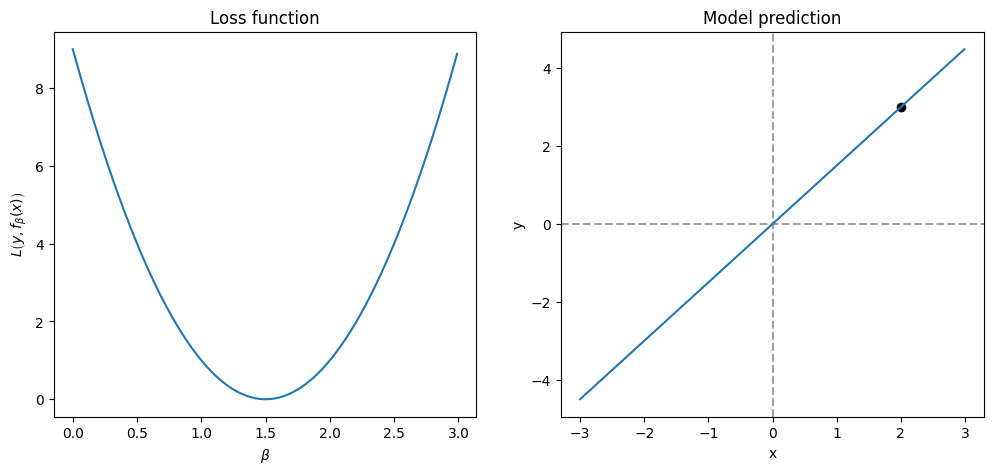

In [4]:
import matplotlib.pylab as plt
import numpy as np


x = 2
y = 3
L = lambda beta: (y - beta * x)**2
beta_range = np.arange(0, 3, 0.01)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(beta_range, L(beta_range))
axs[0].set_xlabel(r"$\beta$")
axs[0].set_ylabel(r"$L\left(y, f_{\beta}(x) \right)$")
axs[0].set_title("Loss function")

x_range = np.arange(-3, 3, 0.01)
axs[1].scatter(2, 3, color = "black")
axs[1].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].plot(x_range, 1.5 * x_range, label = r"$\beta = 1.5$")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("Model prediction")

plt.show()

In the realistic case with multiple data points, it is usually not possible to generate perfect predictions of the model, no matter how well the parameters of the model are chosen. However, the parameters of the model can be determined using the same logic as in the previous example. Let us add another data point $(x_2 = 3, y_2 = 2)$ to our sample next to the point $(x_1 = 2, y_1 = 3)$. The loss function becomes:

$$
\begin{split}
L\left(y, f_{\beta}(\boldsymbol{x}) \right) & = \frac{1}{2} \left( \left(y_1 - f_{\beta}(x_1)\right)^2 +  \left(y_2 - f_{\beta}(x_2)\right)^2 \right) = \\
& = \frac{1}{2} \sum_{i = 1}^2 \left(y_i - f_{\beta}(x_i)\right)^2 = \\
& = \frac{1}{2} \sum_{i = 1}^2 \left(y_i - \beta x_i\right)^2 
\end{split}
$$

Even if the representation becomes somewhat more formal by the sum sign, a possible minimum can be determined as before by the first derivative:

$$
\begin{aligned}
\frac{\partial L}{\partial \beta} = \frac{1}{2} \sum_{i=1}^2 2 \left(y_i - \beta x_i\right) \cdot (-x_i) = \sum_{i=1}^2 \left(y_i - \beta x_i\right) \cdot (-x_i) \stackrel{!}{=} 0 \\
\sum_{i=1}^2 - x_i y_i + \sum_{i=1}^2 \beta x_i^2 = 0 \\
\beta \sum_{i=1}^2 x_i^2 = \sum_{i=1}^2 x_i y_i  \\
\beta = \frac{\sum_{i=1}^2 x_i y_i }{\sum_{i=1}^2 x_i^2 }
\end{aligned}
$$

In our example, this results in the value $\beta = \frac{12}{13}$. The lower graph visualizes that in this way a straight line results, which runs between the two points. The model tries to be as close as possible to both points. 

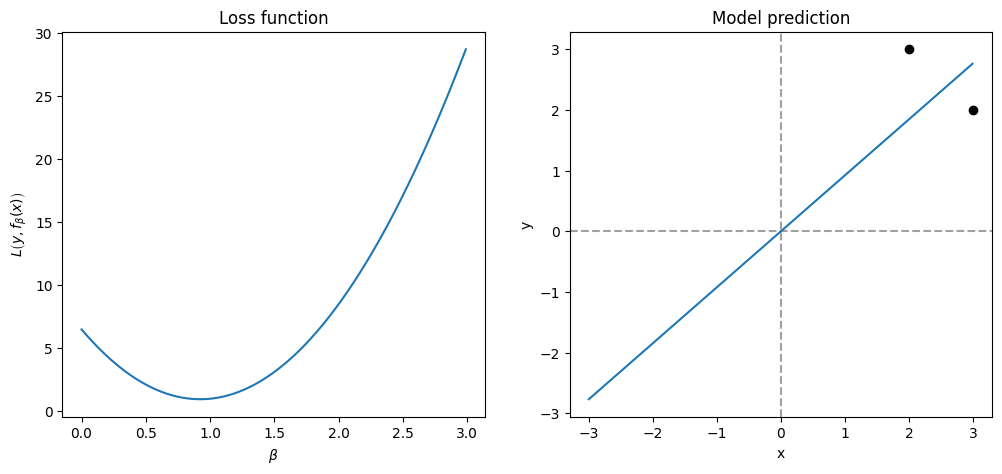

In [5]:
import matplotlib.pylab as plt
import numpy as np

x = np.array([2., 3.])
y = np.array([3., 2.])

L = lambda beta: np.mean((y - beta * x)**2)
beta_range = np.arange(0, 3, 0.01)
losses = np.array([L(beta_) for beta_ in beta_range])

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(beta_range, losses)
axs[0].set_xlabel(r"$\beta$")
axs[0].set_ylabel(r"$L\left(y, f_{\beta}(x) \right)$")
axs[0].set_title("Loss function")

x_range = np.arange(-3, 3, 0.01)
axs[1].scatter(x, y, color = "black")
axs[1].axhline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].axvline(0, color = "grey", linestyle = "--", alpha = 0.75)
axs[1].plot(x_range, 12/13 * x_range, label = r"$\beta = 1.5$")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].set_title("Model prediction")

plt.show()

We note that the fitting of the model of the data is done by mathematical optimization. Here it is important to understand that the data points of the sample $(x_1, y_1), ..., (x_n, y_n)$ are invariant values and the fitting of the model is done by choosing the parameters. In the general case with multiple data points and a regression problem, the common loss function is:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \frac{1}{n} \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2
$$

or since for the identification of the minimum the constant $\frac{1}{n}$ is insignificant, sometimes also:

$$
L\left(\boldsymbol{y}, f_{\boldsymbol{\beta}}(\boldsymbol{X}) \right) = \sum_{i=1}^n \left(y_i - \boldsymbol{\beta}^T \boldsymbol{x}_i \right)^2
$$

Even if the minimization for the general case becomes somewhat more difficult than in our simple examples, all values for $\boldsymbol{\beta}$ can be determined in an analytical way for the linear regression model. This solution is given by:

$$
\hat{\boldsymbol{\beta}} = \left( X^T X \right)^{-1} X^T \boldsymbol{y}
$$

with $X$ representing the matrix which contains realizations for each variable and observations and $\boldsymbol{y}$ including all realizations of the target variable. Note, that estimated parameters are usually given an umbrella symbol such as $\hat{\boldsymbol{\beta}}$ to underline that they are estimates from the sample and not the true values of the whole population. 

## Estimation uncertainty

Before we go into a specific example, let's look a little more closely at the aspect of estimation uncertainty. In some cases, it may be theoretically possible to have access to the data of the entire population and thus determine the true value of a parameter. For example, it is theoretically possible to determine the average height of all adult citizens in a country. However, this often fails due to practical aspects of data collection and questions of economic benefit, as the collection of all data often involves high costs. Accordingly, as soon as one does not resort to all values of the population, but tries to determine the unknown value of the population through a random sample, the uncertainty in the estimated value arises due to the randomness of the sample collection. If a random sample is drawn more often, the random realizations and thus the estimated parameters per sample will differ. If we look at the highly simplified example in the bottom cell, we see that when random draws are made from a population and the expected value is estimated by the arithmetic mean, there will be varying values that always deviate from the true value. Such behavior always exists when the parameters of models are estimated from samples. The more the estimated parameters vary, the higher the statistical uncertainty and the associated inference. How much the parameters vary can be quantified by the standard errors. These are used to calculate important statistical ratios such as the confidence interval and the p-value.

In [6]:
import numpy as np

n = 5

population = np.array([22, 21, 25, 27, 22])
print("The population values are:")
print(population)
print(" ")
idx = np.arange(1, n) - np.tri(n, n-1, k=-1, dtype=bool)

sample_means = population[idx].mean(axis = 1)
true_mean = population.mean()

print("The true mean of the population is:")
print(true_mean)
print(" ")
print("Sample means with leave one out drawing are:")
print(sample_means)

The population values are:
[22 21 25 27 22]
 
The true mean of the population is:
23.4
 
Sample means with leave one out drawing are:
[23.75 24.   23.   22.5  23.75]


Frequentist statistical hypothesis tests attempt to incorporate the uncertainty of the parameter estimate when testing a hypothesis. For example, in the null hypothesis, if one assumes that the variable $x_1$ has no non-zero influence on the dependent variable, then due to the randomness of sampling, it is still possible that $\hat{\beta}_1$ takes on a non-zero value, even if the true value is $\beta = 0$. However, if one can determine the standard error of the parameter estimator, one is able to set limits above which the estimated random value of a sample for a given hypothesis seems very implausible. In addition to classical tests, confidence intervals are often included with estimated parameters. The higher the standard error of an estimator, the wider the interval, the less concrete the inference about the estimated influence of the associated variable. The exact functioning of hypothesis tests and the handling of confidence intervals should be content of introductory statistics courses of your studies, but with this discussion I would like to sensitize you to the importance of the statistical uncertainty of estimated parameters of a model. When analyzing a model, the focus should not only be on the estimated value, but also on its uncertainty.

To understand, how a model works, it is often helpful to create synthetic data by simulation. Very likely, this is new for you, so for the moment let us not go into the details how random numbers can be generated. Nevertheless, you should remember from statisics, that random variables are defined by their distribution. For instance a standard normal distribution's density function looks like the one below. A density ditribution of a continuous variable only must fulfill that $f(x) \geq 0$ for all $x$ and that $\int_{-\infty}^{\infty} f(x)dx = 1$. The probability for a realization to fall in an interval $[x_l, x_u]$ is given by: 

$$
P\left(x_u \leq x \leq x_u\right) = \int_{x_l}^{x_u} f(x) dx
$$

This means the larger the area under the density curve over an interval, the higher the probability that a random realizaton falls within the interal. If we interpret probabilities as empirical frequencies, this means relatively often, we are going to observe realizations in intervals with large areas under the density function. For instance, the frequency of realizations in the interval $[-1, 1]$ are going to be higher than in the inveral $[-4, -3]$ for a standard normal distribution. If we simulate data from a standard normal distribution, frequencies of realizations in certain intervals will be close but not exactly equal to the corresponding probabilities. 

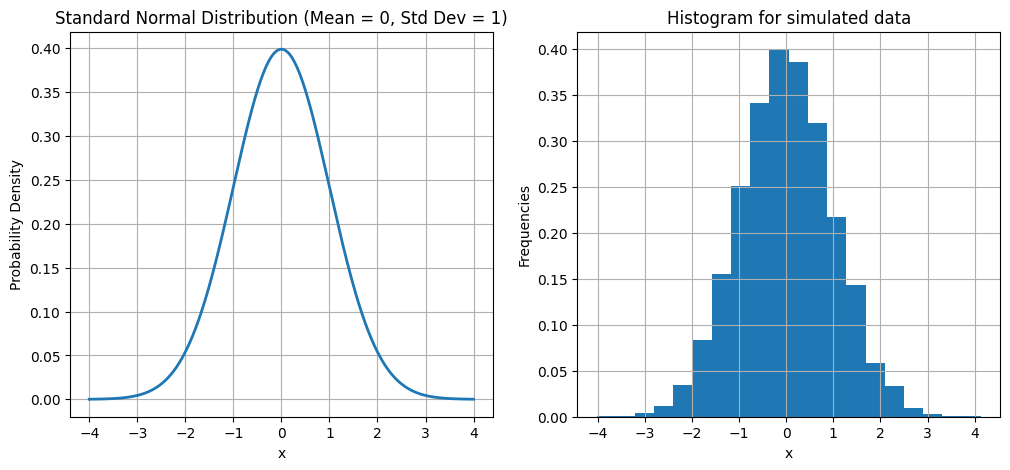

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)
y_rnd = np.random.randn(10000)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(x, y, label='Standard Normal Distribution', linewidth=2)

ax[0].set_title('Standard Normal Distribution (Mean = 0, Std Dev = 1)')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Probability Density')

ax[0].grid(True)

ax[1].hist(y_rnd, bins = 20, density = True)
ax[1].set_title("Histogram for simulated data")
ax[1].set_xlabel('x')
ax[1].set_ylabel('Frequencies')
ax[1].grid(True)

# Display the plot
plt.show()

To simulate data according to a regression model, we need some fixed observations for the independent variables. We simulate them below, however, keep them fixed to replicate the real life behavior that originally all values for $X$ are assumed to be fixed.

In [8]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_samples = 1000  # Number of observations
n_features = 3   # Number of independent variables (excluding the intercept)

beta_0 = 5  # Intercept
beta = np.array([4, -3, 0])  # Coefficients for the features

X = np.random.randn(n_samples, n_features)  # Normally distributed features
X_with_intercept = np.c_[np.ones(n_samples), X]

true_standard_error = np.sqrt(np.diag(np.linalg.inv(X_with_intercept.T @ X_with_intercept)))

pd.DataFrame(X, columns = ["x_1", "x_2", "x_3"]).head()

,x_1,x_2,x_3
0,0.496714,-0.138264,0.647689
1,1.523030,-0.234153,-0.234137
2,1.579213,0.767435,-0.469474
3,0.542560,-0.463418,-0.465730
4,0.241962,-1.913280,-1.724918


To simulate data for the regression model, we further need to declare true values for the model parameters. In case of the regression model, these are the beta values and the standard deviation for $\epsilon$. In our example, we set:

$$
\mathbf{\beta} = 
\begin{pmatrix}
5 \\
4 \\
-3 \\
0
\end{pmatrix}, \sigma_{\epsilon} = 1
$$

For each observation, we calculate $\boldsymbol{\beta}^T \boldsymbol{x}$, draw a random standard normally distributed random number and add both values to simulate an obsevation for $y$. The cell below simulates data like this and creates a pairplot. The first line exhibits the pairwise realtion between the target variable $y$ and the independent variables $x_1, x_2, x_3$. Note, that data changes every time you click the play button next to the cell as data is simulation is refreshed. Also take a look and execute the next cell as well. It estimates the parameters of the model for the simulated data. It is important to understand that these estimates differ from the true values (which in reality we never know). The reason for that is the random part of the data. As the random part is different for every data sample (because it is random), parameter estimates for every data sample will be different. 

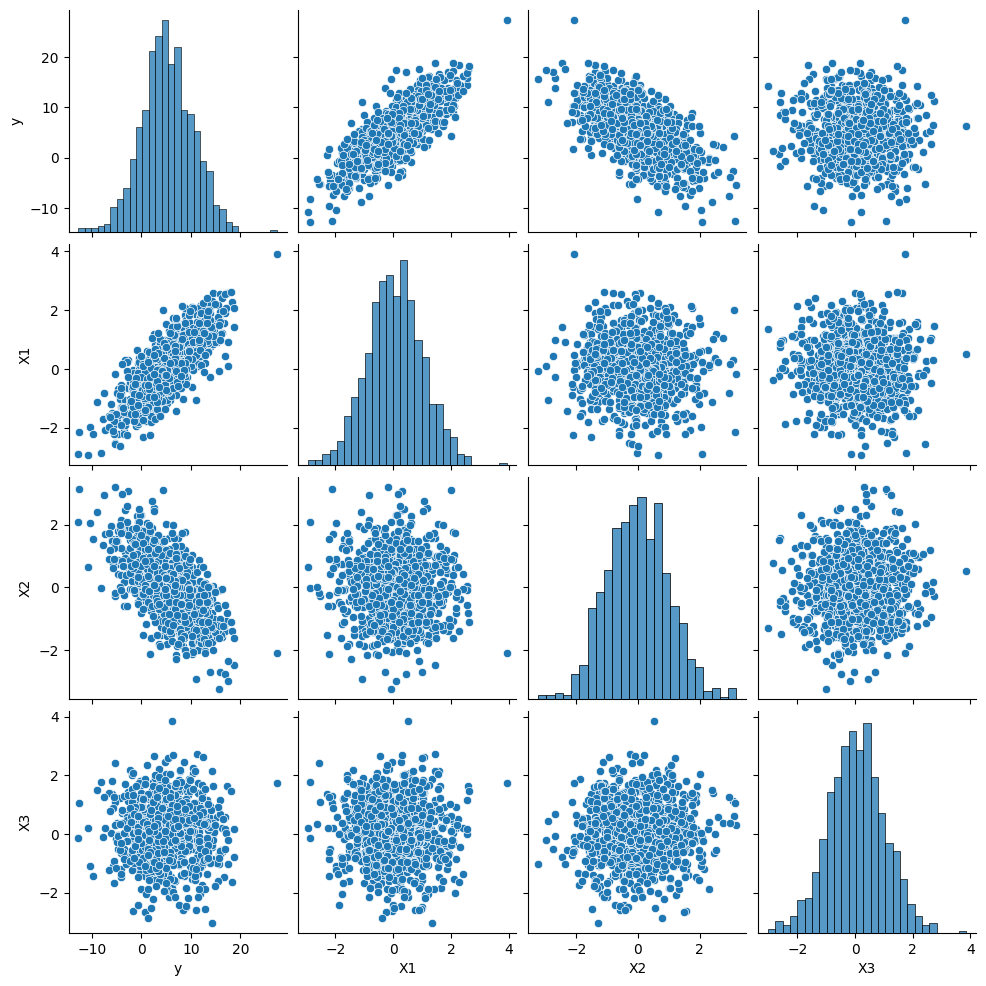

In [9]:
import seaborn as sns
import matplotlib.pylab as plt

noise = np.random.randn(n_samples)  # Normally distributed random noise
y = beta_0 + X @ beta + noise
data = pd.DataFrame(np.c_[y, X], columns=['y', 'X1', 'X2', 'X3'])
sns.pairplot(data)
plt.show()

In [10]:
import statsmodels.api as sm

X_reg = data.loc[:, ["X1", "X2", "X3"]]
y = data.loc[:, "y"]
X_reg = sm.add_constant(X_reg)

model = sm.OLS(y, X_reg)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     8088.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:39:43   Log-Likelihood:                -1444.0
No. Observations:                1000   AIC:                             2896.
Df Residuals:                     996   BIC:                             2916.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9820      0.033    152.904      0.0

To demonstrate the variability of estimated regression coefficients (parameters), we repeatedly, create new randomly simulated datasets, estimate the parameters of the model and store their values. If we do this for 1,000 times below, we can plot the histograms of parameter estimates for the beta parameters. As you can see, parameter estimates are often close to the true values from the simulation, but, for a few sample, can also deviate to a large extent. For instance, even though, there is no relation between $x_3$ and $y$ because $\beta_3 = 0$, a view samples create estimates, e.g., $\hat{\beta}_3 \leq -0.05$ or $\hat{\beta}_3 \geq 0.05$ which might indicate a moderate impact between $x_3$ and $y$. The standard deviation of these estimates are denoted as the standard error in this context. Let us denote it by $\sigma_{err}$ If you take a look in the cell above, you can see the column "std err" right next to the column "coef", the "t" column are $t$ statistics under the assumption:

$$
\text{H}_0:  \beta_j = 0 \\
\text{H}_1:  \beta_j \neq 0 \\
$$

This is the default hypothesis for every $\beta$ estimate in a regression output as shown above. If the hypothesis can be rejected, we infer that the corresponding variable has an effect which is statistically different from zero. In general, the $t$ value is calculated by:

$$
t = \frac{\hat{\beta} - \beta^{H_0}}{\sigma_{err}}
$$

However, as $\beta^{H_0} = 0$ by default, for the regression output it becomes:

$$
t = \frac{\hat{\beta}}{\sigma_{err}}
$$

The p-value next to the t statistic is calculated as: $P\left(T \geq |t_j| \right) \cdot 2$

Thus, we may interpret the t statistic as a normalized version of the estimated parameter, the higher it is, the less the estimated parameter is in line with the null hypthesis. Very commonly, the standard null hypothesis in regression outputs is the parameter to be equal zero. If the null is rejected, we assume that $x_j$ has an impact on $y$ which is statistically significant different from zero.

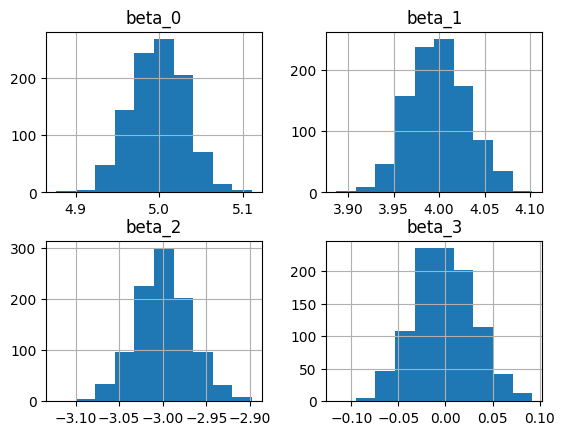

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pylab as plt

iterations = 1000

betas = pd.DataFrame(columns = [f"beta_{j}" for j in range(X_with_intercept.shape[1])])
for i in range(iterations):
    noise = np.random.randn(n_samples)  # Normally distributed random noise
    y = beta_0 + X @ beta + noise

    data = pd.DataFrame(np.c_[y, X], columns=['y', 'X1', 'X2', 'X3'])

    model = LinearRegression(fit_intercept=False)  # No additional intercept since we include it in X
    model.fit(X_with_intercept, y)
    
    # Get the estimated coefficients
    estimated_betas = model.coef_
    
    # Store the coefficients in the results DataFrame
    betas.loc[i] = estimated_betas

betas.hist()
plt.show()

Finally, let us take a look at a real example where we want to analyze a possible influence of the advertising channel on sales. In the associated output, we see that a positive influence of television and rate advertising on sales is measurable. The sign of the news variable is negative, but we can see from the p-value that we cannot assume a zero different influence of this variable. This means that, at least from a statistical point of view, it does not make sense to interpret the negative sign as a negative influence of the variable. 

In [12]:
import statsmodels.api as sm
import pandas as pd

advertising_df = pd.read_csv("../data/Advertising.csv", index_col= "Unnamed: 0")
advertising_df.head()
X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        09:39:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

## Model quality

How good the model is at explaining the independent variable is best told by relative comparison. Good regression models should be able to make better predictions using the information from the independent variable than a model that cannot use the information from the independent variable. For example, a naive prediction and appropriate benchmark for a regression problem would be the arithmetic mean of the realizations of the dependent variable $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$. The better a model, the smaller should be, on average, the squared or the absolute deviations between realizations and forecasts. The forecasts of the linear regression model are given by the estimated regression function $\boldsymbol{\hat{\beta}}^T \boldsymbol{x}$:

We define the mean-squared-error (MSE):

$$
MSE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2
$$

As an alternative, we define the mean-absolute-error (MAE):

$$
MAE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n |y_i - \hat{y}_i|
$$

where $\hat{y}$ represents the predicted value that can be generated by a different models. In comparison, the MAE is less affected by isolated high error forecasts. In both cases, the ratio from the respective metric for the regression model and for the unconditional forecast (e.g., $\bar{y}$) can be considered. For example, let us determine:

$$
\frac{\sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2}{\sum_{i = 1}^n \left(y_i - \bar{y}\right)^2} 
$$

the smaller the value, the more advantageous the regression model. This means that with the model and its use of the independent variables, the realizations can be better predicted (and thus better explained) than without the information of the independent variables. Of course, two models can also be compared in this way, each using the information of the independent variable. Merely looking at the MSE and MAE alone is usually not very informative, since all we know is that a value close to zero is a good sign. However, as for the estimation of zero different values, it strongly depends on the numerical range of the dependent variable, which can be considered as a lower value. Therefore, it is better to always include a meaningful benchmark when evaluating the model. For the linear regression model, a normalized variant of the goodness-of-fit measure is often used, the coefficient of determination $R^2$, which is given by:

$$
R^2 = 1 - \frac{\sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2}{\sum_{i = 1}^n \left(y_i - \bar{y}\right)^2} 
$$

The range of values lies between $0$ and $1$, whereby higher values indicate a better explanatory quality of the linear regression model. If the assumption of a linear relationship between the independent and the dependent variable is violated, however, values smaller than $0$ can also result. Since the model quality usually increases with the inclusion of further independent variables, the adjusted coefficient of determination should rather be used for the output of the linear regression, which corrects this property by:

$$
R_{\text{adj}}^2 = 1 - \left( \frac{(1 - R^2) \cdot (n - 1)}{n - p} \right)
$$

In addition to quantitative model quality, it is often useful to generate a scatterplot where realizations are plotted on the x-axis and predictions are plotted on the y-axis. A perfect model would produce points along a diagonal, points above the diagonal representing overestimates and points below representing underestimates of the model. Another informative scatterplot is the visualizations of the variances $\epsilon = y - \hat{y}$ across all observations. This plot can be used to visually check whether there are systematic deviations across the observations.

In the bottom cell, we determine the ratio of the MSE for the linear regression model and $\bar{y}$. In addition, we look at the two graphs mentioned above. Overall, the model seems to explain the sales values relatively well and, more importantly, much better than the unconditional forecast $\bar{y}$. However, it seems that the model provides better forecasts for higher sales values than for smaller values and, in particular, sales values in the middle range are systematically overestimated. These findings suggest that the linear relationship between the independent variables and the dependent variable may not fully reflect reality and that a model that is able to represent non-linear relationships may be more appropriate.

The mean squared error ratio of the linear regression model and the arithmetic mean of sales is: 0.1028


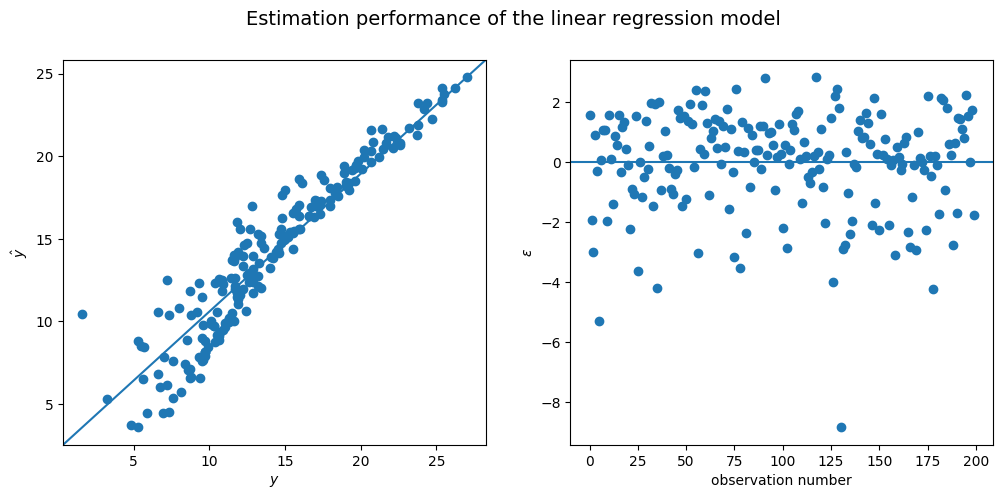

In [13]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt


X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

y_hat = results.predict(X)

mse_model = mean_squared_error(y, y_hat)
mse_benchmark = mean_squared_error(y, [y.mean()]*y.shape[0])

print(f"The mean squared error ratio of the linear regression model and the arithmetic mean of sales is: {mse_model / mse_benchmark:.4f}")

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(y, y_hat)
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes)
axs[0].set_xlabel(r"$y$")
axs[0].set_ylabel(r"$\hat{y}$")
axs[1].scatter(range(advertising_df.shape[0]), y - y_hat)
axs[1].axhline(0)
axs[1].set_xlabel(r"observation number")
axs[1].set_ylabel(r"$\epsilon$")
fig.suptitle(r"Estimation performance of the linear regression model" , fontsize=14)
plt.show()

## Assessment of the independent variables

Once the model has been estimated and its goodness of fit has been found to be sufficient, the results of the parameter estimation can be used to identify the variables with the greatest influence on the dependent variable. The estimated parameters of the advertising regression model are $\hat{\beta}_{\text{TV}} = 0.0458$, $\hat{\beta}_{\text{radio}} = 0.1885$, $\hat{\beta}_{\text{newspaper}} = -0.0100$. Based on these values, one would initially assume that the greatest influence comes from radio advertising, since an increase in this by one unit is accompanied by the greatest increase in the dependent variable. However, it should be noted that the numerical range of realizations of this variable may differ from those of the others, making the one-unit changes not comparable. If we look at the numerical range of the independent variables in the lower cell, this is exactly the case. In order to truly compare the estimated parameters and their impact on the dependent variable, they must first be brought to comparable ranges of values. If the model is estimated with these standardized variables, the respective influence of the independent variable can be compared on the basis of the estimated parameter.

In [14]:
advertising_df.loc[:, ["TV", "radio", "newspaper"]].describe()

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In the bottom cell, we estimate the model again using standardized values of the independent variables. The estimated parameters are $\hat{\beta}_{\text{TV}} = 3.9193$, $\hat{\beta}_{\text{radio}} = 2.7921$, $\hat{\beta}_{\text{newspaper}} = -0.0225$. Using these values, we can identify the largest impact due to TV advertising, which brings a $3.9193$ increase in sales when TV advertising spending is increased by one standard deviation.

In [15]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = advertising_df.loc[:, ["TV", "radio", "newspaper"]]
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = ["TV", "radio", "newspaper"], index = X.index)

y = advertising_df.loc[:, "sales"]
X_scaled = sm.add_constant(X_scaled)

model = sm.OLS(y, X_scaled)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        09:39:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.0

## Variable selection

So far, we have assumed that all available variables are included in the model. However, this may not always be advantageous. In particular, if individual independent variables do not contribute positively to the improvement of the model, it makes little sense to include these variables in the model. In addition, problems can also arise if independent variables are highly correlated (collinearity). So which selection is the best for the model. With a small number of independent variables, models can theoretically be estimated for all variable combinations and compared based on their goodness of fit. However, for $p$ independent variables $2^p$ combination possibilities exist, so one quickly reaches the limits of computational implementation with this approach. In practice, models with a subset of all independent variables are usually determined sequentially. This can be done either in "forward" or "backward" manner. In forward selection, one starts with a model without independent variables and estimates models with one variable each. The variable that improves the quality of the model the most is included in the model first. Subsequently, models are estimated and evaluated again, each time with the addition of a variable other than the one already selected. The variable that brings the greatest improvement is again included. The process is terminated, if by the renewed addition of a variable no more significant improvement develops. What is considered a significant improvement is determined by the user. In backward selection, a model with all variables is estimated in the first step. Subsequently, models are estimated with the respective omission of a variable. The variable whose omission reduces the model quality the least is removed from the model. This process is repeated until the reduction in model goodness is deemed too high.

As an example, we consider the forward selection for the Advertising dataset. We use the $R^2$ as a metric to quantify the goodness. In the first step, we select the TV variable. Next, we see an increase in $R^2$ of $0.2853$ when the radio variable is included in the model. Including the newspaper variable would not increase the $R^2$ any further, so there is no need to include this variable in the model.

In [16]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
import numpy as np

variables = ["TV", "radio", "newspaper"]

r2_scores = []
for variable in variables:
    X = advertising_df.loc[:, [variable]]
    y = advertising_df.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    y_hat = results.predict(X)
    r2_scores.append(np.round(r2_score(y, y_hat), 4))

print(f"Variable names: {variables}")
print("R^2 values for univariate regressions:")
print(r2_scores)
print(f"Variable with the highest R^2 value: {variables[np.argmax(r2_scores)]}")
print("Continue with the selection of the next variable:\n")
variables = ["radio", "newspaper"]

r2_scores = []
for variable in variables:
    X = advertising_df.loc[:, ["TV", variable]]
    y = advertising_df.loc[:, "sales"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    y_hat = results.predict(X)
    r2_scores.append(np.round(r2_score(y, y_hat), 4))

print(f"Remaining variable names: {variables}")
print("R^2 values for regressions:")
print(r2_scores)
print(f"Variable with the highest R^2 improvement: {variables[np.argmax(r2_scores)]}")

Variable names: ['TV', 'radio', 'newspaper']
R^2 values for univariate regressions:
[np.float64(0.6119), np.float64(0.332), np.float64(0.0521)]
Variable with the highest R^2 value: TV
Continue with the selection of the next variable:

Remaining variable names: ['radio', 'newspaper']
R^2 values for regressions:
[np.float64(0.8972), np.float64(0.6458)]
Variable with the highest R^2 improvement: radio


## Deviations of the model assumptions

The linear regression model uses simplifying assumptions. We want to discuss these again in conclusion, in order to sensitize with it, whereby wrong estimations can originate under the use of the linear regression model. Specifically, the assumptions are as follows:

* Linear relationship between the independent and the dependent variable.
* Normal distribution of the dependent variable
* Homoscedasticity 
* Independent error terms
* Low correlation of the independent variables (low or no multicollinearity).

**Linear relationship**

The linear regression line establishes a linear relationship between the independent and dependent variable. This means that the change of an independent variable by one unit always leads to a constant change of the dependent variable. This is not always realistic. For example, one may assume that the increase for advertising expenses above a certain amount will lose the additional benefit of increased sales. In this case, it would not be the case that the increase in advertising expenditure always leads to the same increase in sales, but rather that the increase in sales depends on how high the expenditure on advertising measures already is. Another assumption of the classical linear regression model is that the additivity of the independent variables. This means that the influence of each independent variable is independent of the other variables. This changes if, for example, interaction effects are included. With an interaction effect one is interested in interactions of the influence of several variables. For the example of the advertisement data set, we have seen after variable selection that:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \beta_2 x_{\text{radio}} + \epsilon
$$

is a good model. If we include the interaction term, the model changes to:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \beta_2 x_{\text{radio}} + \beta_3 x_{\text{TV}} x_{\text{radio}} + \epsilon
$$

Alternatively, we can make this model either to:

$$
y = \beta_0 + \left(\beta_1 + \beta_3 x_{\text{radio}} \right) x_{\text{TV}} + \beta_2 x_{\text{radio}} + \epsilon
$$

or to:

$$
y = \beta_0 + \beta_1 x_{\text{TV}} + \left(\beta_2 + \beta_3 x_{\text{TV}} \right) x_{\text{radio}} + \epsilon
$$
 
Depending on the variant of the model, it becomes apparent that the influence of TV advertising or radio advertising depends on the other type of advertising, and thus the original characteristic of additivity disappears. In the bottom cell, we estimate the model with the interaction term. We see from the output that the interaction term has a significantly non-zero positive impact. In addition, the coefficient of determination improves. The positive value can be interpreted that the positive influence of one advertising measure increases when the other advertising measure is increased.

In [17]:
import statsmodels.api as sm
import matplotlib.pylab as plt


X = advertising_df.loc[:, ["TV", "radio"]]
X.loc[:, "TV_radio"] = X.TV * X.radio
y = advertising_df.loc[:, "sales"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 20 Nov 2024   Prob (F-statistic):          6.68e-146
Time:                        09:39:44   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

In addition to including interactions (and thus relaxing the additivity assumption), the linear regression model can also be fitted to represent possible non-linear relationships. Possible solutions are given by adding polynomials or by splines. However, the modeling of non-linear relationships is done in a later chapter.

**Normal distribution assumption**

So far we did not discuss the difference of the regression model:

$$
y = \boldsymbol{\beta}^T \boldsymbol{x} + \epsilon
$$

and the regression line:

$$
y = \boldsymbol{\beta}^T \boldsymbol{x} 
$$

any further. By the regression line only the conditional expected value for $y$ is determined. Conditional on the information of the independent variables $\boldsymbol{x}$, what value do we expect for $y$. However, in the traditional regression model, the assumption is often still made that $\epsilon$ is normally distributed $\epsilon \sim N(0; \sigma^2)$. It follows that $y$ is also normally distributed, $y \sim N(\boldsymbol{\beta}^T \boldsymbol{x} ; \sigma^2)$. Thus, through the model, not only can the expected value be estimated, but we can also perform calculations for other parts of the distribution. For example, given values of the independent variables, we can determine the probability of falling below or exceeding a given value for $y$. These estimates are only accurate if the normal distribution assumption is not violated. For this purpose, the Jarque-Bera test with the null hypothesis of a normal distribution is often shown in the output of the model. In our example, this assumption would be rejected (using a common significance level such as $0.01$ or $0.05$). In principle, this is less problematic for the estimation of the parameters, but no statements should be made based on the normal distribution. The assumption of normal distribution is made relatively often in the literature for various models, although in reality it often has to be discarded for empirical data. Its nevertheless frequent use often has something to do with the mathematically pleasing properties of the normal distribution.

**Homoskedasticity**

The property of homoscedasticity arises from the assumption that the variance of all residuals is equal $\epsilon \sim N(0; \sigma^2)$, if this is not true, individual observations $i$ exhibit different variances $\sigma_i^2$. In the cell below, you can see an example of simulated data whose variance increases with the independent variable. The corresponding residual plot is particularly meaningful here, as it gives a good graphical indication that the variances of the predictions vary in different ways. The good news is that the estimated parameters of the regression line can be further trusted since they are consistently unbiased, but attention should be paid to statistical inference in the presence of heteroscedasticity. The standard errors of the estimators tend to be underestimated, which can lead to erroneous inferences. Options for dealing with heteroskedasticity include adjusting the standard errors or adjusted estimation procedures such as the weighted least squares approach. One may use different approaches to identify potential heteroskedasticity. A good way is to examine the residual plot. If you want you can add statistical tests like the Breusch-Pagan or White test. Given, heteroscedasticity, a difference in the standard errors will result.  

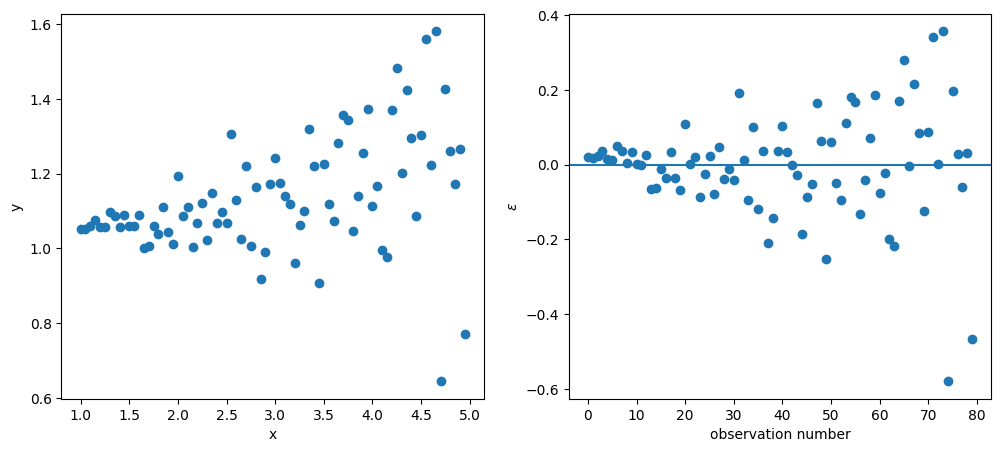

In [18]:
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import pandas as pd


# simulate data
beta_0, beta_1 = 1, 0.05
sigma_c = 1.

x = np.arange(1, 5, 0.05)
y = []
np.random.seed(42)
for i in range(len(x)):
    y.append(beta_0 + beta_1 * x[i] + np.random.normal() * sigma_c * 0.003 * (i+1))

df = pd.DataFrame({"x": x, "y": y})
X = df.x
y = df.y
X = sm.add_constant(X)

# estimate model
model = sm.OLS(y, X)
results = model.fit()
epsilon = y - results.predict(X)

# visualize residuals
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(x, y)
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[1].scatter(range(len(df)), epsilon)
axs[1].axhline(0)
axs[1].set_xlabel(r"observation number")
axs[1].set_ylabel(r"$\epsilon$")
plt.show()

First, take a look at the model output below, if we do not correct standard errors for heteroscedasticity. Especially, take a look at the standard error for $\hat{\beta}_1 = 0.014$.

In [19]:
import statsmodels.formula.api as smf
import pandas as pd

model = smf.ols(
    formula="y ~ x",
    data = df
).fit() #, 

#
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     14.02
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           0.000344
Time:                        09:39:44   Log-Likelihood:                 42.582
No. Observations:                  80   AIC:                            -81.16
Df Residuals:                      78   BIC:                            -76.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9804      0.044     22.046      0.0

Now, watch at the output and the same standard error, if we include a correction for heteroscedasticity. The standard error increases from $0.014$ to $0.018$, this reduces the $t$ statistic which increases the p-value. In the example, one still would infer a significant impact of the independent variable, however, in reality, correcting for heteroscedasticity can lead to different inferences on the data. Note, that we do not discuss, how corrections are made, however, the potential impact should be clear to you.

In [20]:
import statsmodels.formula.api as smf
import pandas as pd

model = smf.ols(
    formula="y ~ x",
    data = df
).fit(cov_type = "HC3") 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     8.693
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00421
Time:                        09:39:44   Log-Likelihood:                 42.582
No. Observations:                  80   AIC:                            -81.16
Df Residuals:                      78   BIC:                            -76.40
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9804      0.040     24.560      0.0

**Independent error terms**.

The assumption of independent error terms implies that there are no systematic relationships between the residuals $\epsilon$ of the individual observations. This assumption is often not met for time series data or clustered data. Similar to the presence of heteroskedasticity, the consequences primarily affect statistical inference, while the estimators of the regression lines remain asymptotically unbiased. Dealing with this can be done by adjusting the standard errors (in analogy to the proceeding above for heteroscedasticity) or by including adjusted models for the error terms. 

**Multicollinearity**

Finally, it can become problematic for the estimation of the linear regression model if independent variables show (high) dependencies. Intuitively, it becomes difficult to identify the individual influences of these variables separately in this way. In the extreme case of perfect linear dependence, mathematical problems also arise that make estimation impossible. It is therefore always a good idea to look at the correlations of the independent variables in the first step. In the cell below you can see the correlation matrix for our example data set. In this case, the correlation between the two most important variables is relatively low, which is why the aspect of multicollinearity is not relevant for this data set. If high correlations are found, a first simple help could be to remove one of the highly correlated variables from the model. Methodologically, the variance-inflation factor can be used to quantify how pronounced multicollinearity is for the existing data set.

In [21]:
advertising_df.drop(["sales"], axis = 1).corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


## Time-series and cross sectional regressions of asset returns

Linear regression is often used as a tool for analysis in economics and finance. Two very popular examples for the usage of regression models is given by time-series and cross sectional regressions of asset returns. 

### Time-series regressions

Time-series regressions can often be found in the context of factor models. A factor model regresses an asset return $r_{t, j}$ of asset $j$ upon financial factors $f_{t, 1}, f_{t, 2}, ..., f_{t, q}$. One of the most popular factor models is the Capital Asset Pricing Model (CAPM) which is derived based upon Markowitz portfolio theory and has been developed independently by several researchers in the 1960s. First, let us take a look at some background information. In the center of the CAPM is the security market line which illustrates the relationship between the expected excess return of asset $j$ to the excess return of the market portfolio. The latter is the efficient portfolio every rational investor allocates its wealth under certain assumptions. The corresponding formula is:

$$
\mu_j - r_f = \beta_j \left(\mu_M - r_f \right)
$$

with 

* $\mu_j$: the expected return of asset $j$
* $\mu_j$: the expected return of the market portfolio $M$
* $r_f$: the risk free rate of return
* $\beta_j = \frac{\sigma_{jM}}{\sigma_M^2}$: the sensitivity of asset return $j$ to the market portfolio; $\sigma_{jM}$ is the covariance between asset return $j$ and the market portfolio, while $\sigma_M^2$ represents the market portfolio's variance
* $\mu_j - r_f$ and $\mu_M - r_f$: risk premium of asset $j$ and the market portfolio

The security market line tells us that the risk premium for asset $j$ is higher if the asset's returns react more sensitive to the market development. Multiple angles can be taken from that point of view. First, let us take a look at the data generating process behind the security market line which is called the security characteristic line:

$$
r_{t, j} = r_{t, f} + \beta_j \left(r_{t, m} - r_{t, f} \right) + \epsilon_{t, j}
$$

Basically, the security market line is the expected value for the security characteristic line. For simplicity let us denote $\tilde{r}_{t, j} = r_{t, j} - r_{t, f}$ and $\tilde{r}_{t, M} = r_{t, M} - r_{t, f}$, respectively. 

*High betas increase a company's risk:*

The variance of asset return $j$ ($\sigma_{j}$) can be decomposed to:

$$
\sigma_{j}^2 = \beta_j^2 \sigma_{M}^2 + \sigma_{\epsilon}^2
$$

The first part $\beta_j^2 \sigma_{M}^2$ is called systematic risk while $\sigma_{\epsilon}^2$ is called unsystematic or idiosyncratic risk. It can be shown that the latter can be reduced by diversification, however, systematic risk can not. The higher an assets's beta, the higher the systematic risk, and given equal idiosyncratic risk, the higher the asset's risk (when measured by variance).

*Assets with high betas exhibit strong linear relationships:*

The covariance between two assets $k, l$ whose (excess) returns follow the data generating process of the security characteristic line is given by:

$$
\sigma_{kl} = \beta_k \beta_l \sigma_M^2
$$

*Assets with high betas increase the risk of the market portfolio:*

Given a market with $N$ assets with weights $w_{M, 1}, ..., w_{M, N}$, then the market portfolio return is: $r_{t, M} = \sum_i w_{M, i} r_{t, i}$. The covariance $\sigma_{j, M}$ between an asset return $r_{t, k}$ and the market portfolio return is given by:

$$
\sigma_{j, M} = \sum_i w_{M, i} \sigma_{ij}
$$

Thus, the market portfolio's variance (risk) is:

$$
\sigma_M^2 = \sum_j \sum_i w_{M, j} w_{M, i} \sigma{ij} = \sum_j w_{M, j} \sum_i w_{M, i} \sigma_{ij} = \sum_j w_{M, j} \sigma_{M, j}
$$

This shows that assets with a higher covariance to the market portfolio $\sigma_{M, j}$ (which also means that they have a higher beta), increase the portfolio's risk to a larger extent.

The implications of these relationships are:

* Assets with high betas should have a higher risk premium
* Assets with high betas come along with higher non-diversifiable (systemtic) risk, this is the part of risk which matters to diversified investors
* Assets with high betas exhibit stronger linear dependence to other assets
* Assets with high betas increase the market portfolio's risk

For each asset $\beta_j$ can be estimated by the security characteristic line:

$$
\tilde{r}_{t, j} = \beta_j \tilde{r}_{t, M} + \epsilon_{t, j}
$$

This is a linear regression model without an intercept. The intercept should be equal to zero, if the assumptions of the CAPM hold, however, we can further include an intercept in the regression to allow mis-pricing.

$$
\tilde{r}_{t, j} = \alpha + \beta_j \tilde{r}_{t, M} + \epsilon_{t, j}
$$

In this context, the intercept is often denoted by $\alpha$.

```{note}
Please note that all derivations of the model itself are not in the scope of this course. Furthermore, to understand and derive the formulas for the expected value, the variance and covariance of asset returns as shown above, one needs to have background knowledge how to determine the expected value, the variance and covariance of and between linear combinations of random variables.
```




The cell below exhibits regression results for daily excess returns of Apple from the last two years. We use the market portfolio provided by [Kenneth French's data library](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). The beta coefficient is higher than $1$, indicating a sensitive co-movement of Apple's return and the market. The adjusted coefficient of determination is around $45\%$, thus, a significant part of the returns variability can be explained by its relation to the market. 

In [22]:
import pandas as pd
import sqlite3
import statsmodels.api as sm
import matplotlib.pylab as plt

conn = sqlite3.connect("../data/sp_returns.sqlite")
ff_daily = pd.read_sql("Select * From ff_daily;", conn)
df_returns = pd.read_sql("Select * From daily;", conn)
conn.close()
ff_daily["date"] = pd.to_datetime(ff_daily["date"])
ff_daily = ff_daily.rename({"date": "Date", "Mkt-RF": "r_m_exs", "SMB": "smb", "HML": "hml", "RF": "r_f"}, axis = 1)
df_returns["Date"] = pd.to_datetime(df_returns["Date"]).dt.tz_localize(None)

df_tmp = df_returns[df_returns.Symbol == "AAPL"].copy()
df_regression = pd.merge(df_tmp.get(["Date", "r_t"]), ff_daily, on = "Date")

X = df_regression.loc[:, ["r_m_exs"]]
y = df_regression.loc[:, "r_t"] - df_regression.loc[:, "r_f"]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     421.1
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           7.69e-67
Time:                        09:39:45   Log-Likelihood:                 1424.1
No. Observations:                 460   AIC:                            -2844.
Df Residuals:                     458   BIC:                            -2836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.844e-05      0.001      0.055      0.9

To get an idea about the range of beta coefficients and the level of variability explained by the market, we conduct the regression from above for all companies in the S\&P 500, S\&P 400 and S\&P 600, respectively. This includes large, mid-sized and small companies. Furthermore, we also collect sector information according to the GICS standard. The boxplots below exhibit the range of beta coefficients grouped by sector and index, respectively.

We observe variation of beta coefficients between sectors, e.g., companies from the Information Technology sector seems to have higher beta coefficients which higher systematic risk for this sector. Between indices, we examine higher beta levels for smaller companies (S\&P 600), however, the level of variation seems not to be as large as among sectors.

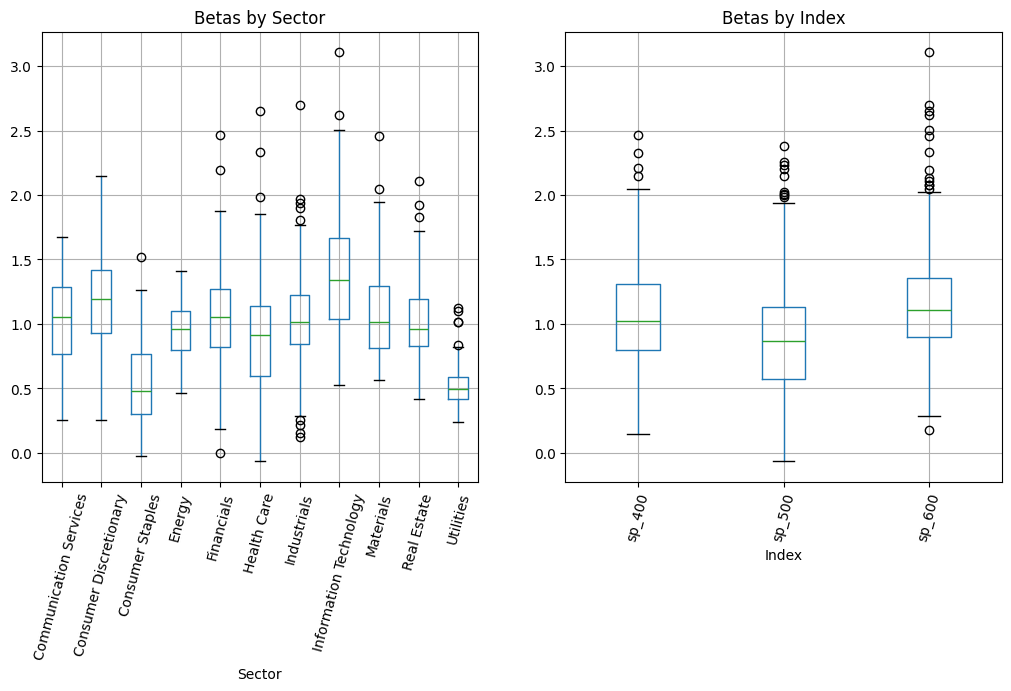

In [23]:
import matplotlib.pylab as plt

regression_results = pd.DataFrame(index = df_returns.Symbol.unique().tolist(), columns = ["alpha", "beta", "p_value_alpha", "R2_adj", "Sector", "Index"])
for ticker, df_tmp in df_returns.groupby("Symbol"):
    df_regression = pd.merge(df_tmp.get(["Date", "r_t"]), ff_daily, on = "Date")
    X = df_regression.loc[:, ["r_m_exs"]]
    y = df_regression.loc[:, "r_t"] - df_regression.loc[:, "r_f"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()
    regression_results.loc[ticker, :"R2_adj"] = results.params.tolist() + [results.pvalues.tolist()[0]] + [results.rsquared_adj]
    regression_results.loc[ticker, "Sector"] = df_tmp["GICS Sector"].iloc[0]
    regression_results.loc[ticker, "Index"] = df_tmp["index"].iloc[0]

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
regression_results.boxplot(column = "beta", by = "Sector", rot = 75, ax = axs[0])
regression_results.boxplot(column = "beta", by = "Index", rot = 75, ax = axs[1])
axs[0].set_title("Betas by Sector")
axs[1].set_title("Betas by Index")
fig.suptitle("")
plt.show()

The next cell exhibits levels for the adjusted $R^2$. Again, the variation among sectors seems to be higher in comparison to the indices (and thus firm sizes). While a few companies exist whose return's variation can not be explained by the market at all, the average level is around $0.25$ with individual values exceeding $0.50$.

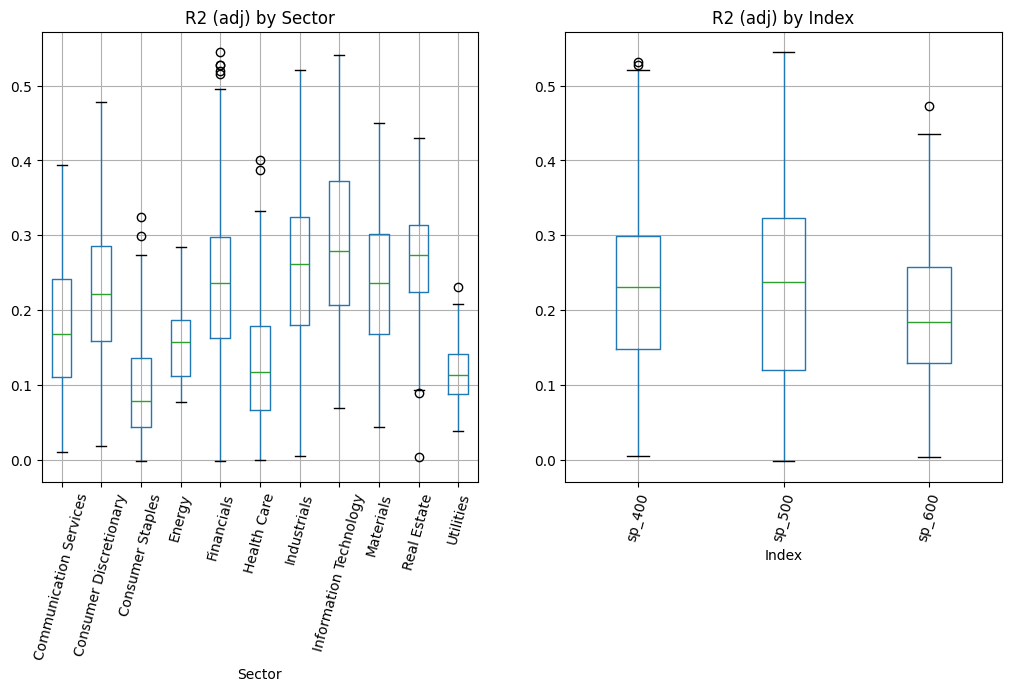

In [24]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
regression_results.boxplot(column = "R2_adj", by = "Sector", rot = 75, ax = axs[0])
regression_results.boxplot(column = "R2_adj", by = "Index", rot = 75, ax = axs[1])
axs[0].set_title("R2 (adj) by Sector")
axs[1].set_title("R2 (adj) by Index")
fig.suptitle("")
plt.show()

Empirical studies revealed that the market portfolio (often also called market factor in this context) seems not to be sufficient to explain asset premium and, thus, returns variation can be better explained when adding more factors to the equation which are build around variables that are fit to differentiate excess returns of companies. Two very prominent examples are the size and book-to-value factors, extending the original model to the Fama-French three factor model. Detailed explanations of the factor constructions can be found [here](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_factors.html), but in short: the small minus big (SMB) factor is similar to a portfolio which invests into smaller companies (according to their market capitalization) and short sells large companies; the high minus low (HML) factor is a portfolio which invests into companies with high ratios of the book-to-market value and short sells companies with low book-to-market values. The book-to-market value compares the book value of a company derived by accounting standards to the market value which captures the investor's belief about the (future) value of the company. Thus, companies with low book-to-market values can indicate high growth potential as the majority of investors seems to believe the value of the company should be higher than its current book value. The regression which is used to estimate the betas for these factors is given by:

$$
\tilde{r}_{t, j} = \alpha + \beta_{M, j} \tilde{r}_{t, M} + \beta_{SMB, j} r_{t, SMB} + \beta_{HML, j} r_{t, HML} + \epsilon_{t, j}
$$

Values for $\beta_{SMB, j}$ indicate if a company's returns rather are in line with the average development of small or large companies, if $\beta_{SMB, j} > 0$, the company's development is in line with the development of smaller companies and vice versa. Values for $\beta_{HML, j}$ indicate if a company's returns rather are in line with the average development of companies which either have a larger or smaller book-to-market ratio, if $\beta_{HML, j} > 0$, the company's development is in line with the development of companies with a higher book-to-market value and vice versa.

Below we observe that the vast majority of companies' returns are more in line with the ones of small companies. Furthermore, the Financials sector is one with the highest $\beta_{HML, j}$ values representing companies which are often referred as value stocks. These companies usually tend to exist for a longer time and are more "settled" in terms of their firm value and the market's perception of it.

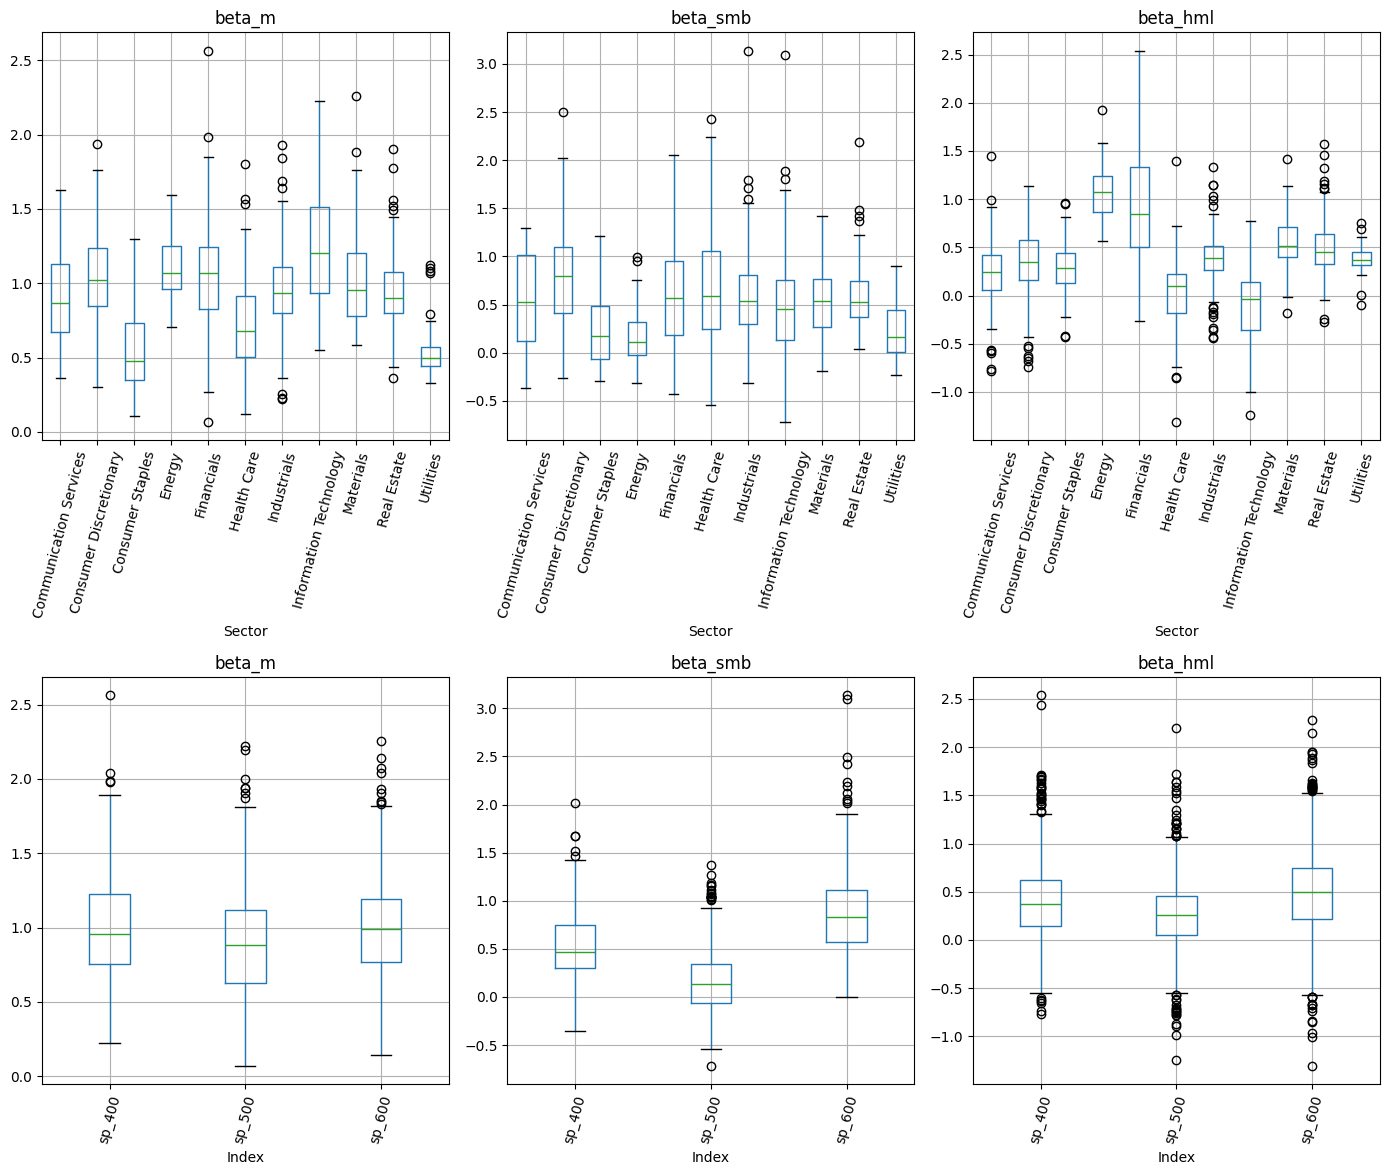

In [25]:
regression_results = pd.DataFrame(index = df_returns.Symbol.unique().tolist(), columns = ["alpha", "beta_m", "beta_smb", "beta_hml", "p_value_alpha", "R2_adj", "Sector", "Index"])
for ticker, df_tmp in df_returns.groupby("Symbol"):
    df_regression = pd.merge(df_tmp.get(["Date", "r_t"]), ff_daily, on = "Date")
    X = df_regression.loc[:, ["r_m_exs", "smb", "hml"]]
    y = df_regression.loc[:, "r_t"] - df_regression.loc[:, "r_f"]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()
    regression_results.loc[ticker, :"R2_adj"] = results.params.tolist() + [results.pvalues.tolist()[0]] + [results.rsquared_adj]
    regression_results.loc[ticker, "Sector"] = df_tmp["GICS Sector"].iloc[0]
    regression_results.loc[ticker, "Index"] = df_tmp["index"].iloc[0]

import matplotlib.pylab as plt

fig, axs = plt.subplots(2, 3, figsize = (14, 12))
regression_results.boxplot(column = "beta_m", by = "Sector", rot = 75, ax = axs[0, 0])
regression_results.boxplot(column = "beta_smb", by = "Sector", rot = 75, ax = axs[0, 1])
regression_results.boxplot(column = "beta_hml", by = "Sector", rot = 75, ax = axs[0, 2])
regression_results.boxplot(column = "beta_m", by = "Index", rot = 75, ax = axs[1, 0])
regression_results.boxplot(column = "beta_smb", by = "Index", rot = 75, ax = axs[1, 1])
regression_results.boxplot(column = "beta_hml", by = "Index", rot = 75, ax = axs[1, 2])
fig.suptitle("")
fig.tight_layout()
plt.show()

Taking a look at the adjusted $R^2$ values, we observe that a larger level of the returns' variation can be explained by including the size and value factors. This underlines empirical findings which speak against the CAPM and the existence of factors which impact the asset risk premium beyond the covariance to the market.

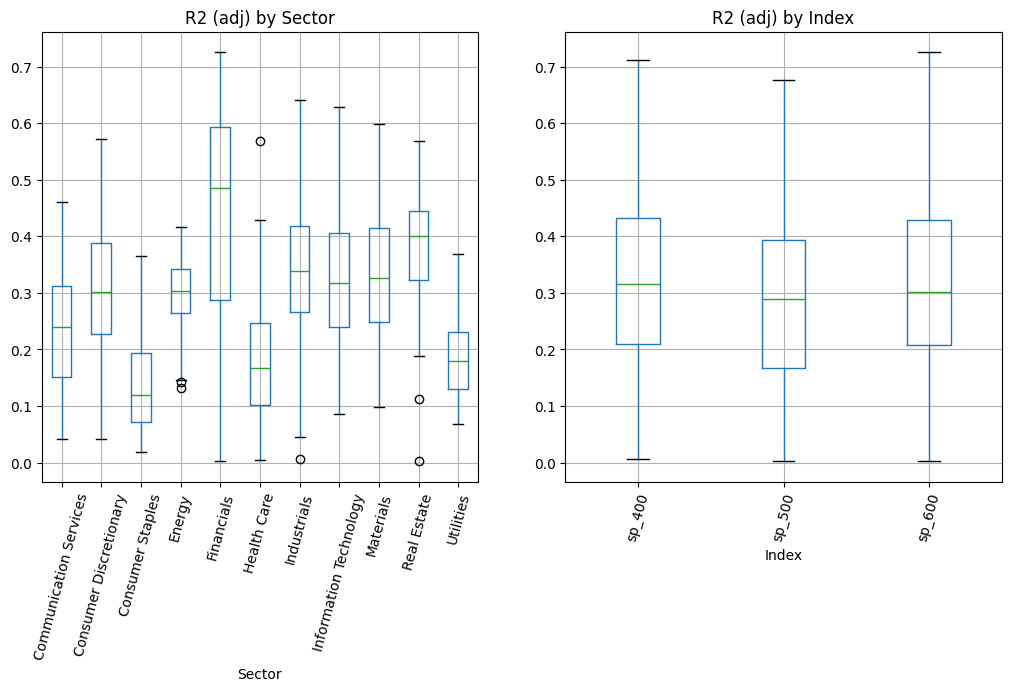

In [26]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 2, figsize = (12, 6))
regression_results.boxplot(column = "R2_adj", by = "Sector", rot = 75, ax = axs[0])
regression_results.boxplot(column = "R2_adj", by = "Index", rot = 75, ax = axs[1])
axs[0].set_title("R2 (adj) by Sector")
axs[1].set_title("R2 (adj) by Index")
fig.suptitle("")
plt.show()

## Cross sectional regressions of asset return

The addition of a SMB and BTM factor to the time-series regression is related to findings which stem from cross sectional regressions in the previous literature. These cross sectional regressions aim to identify which firm variables impact asset returns risk premiums. The foundation of empirical studies in this context are regression of the form:

$$
\tilde{r}_{j, t + 1} = \alpha_i + \beta_{t}^{f_1} f_{j1, t} + \beta_{t}^{f_2} f_{j2, t} + ... + \beta_{t}^{f_p} f_{jp, t} + \epsilon_{j, t}
$$

The main differences are that the regression $\beta$-s are time specific and the factor observations are all at the same point in time. The former can be identified by the $t$ in the index of each $\beta$. To keep the notation simple, let us take a look at a specific example. For a month $t+1$, we regress the excess return of each company $j$ on three variables at time $t$, i.e., the log-market-cap ($Size_t$), the book-to-market-value ($BTM_t$) and the six month momentum of each company ($MoM_t$). The latter is simply the percentage change in the stock price over the past six month. The regression is:

$$
\tilde{r}_{j, t + 1} = \alpha_i + \beta_{t}^{Size} Size_{j, t} + \beta_{t}^{BTM} BTM_{j, t} + \beta_{t}^{MoM} MoM_{j, t} + \epsilon_{j, t}
$$

The data sample for our analysis includes US stock listed companies from major stock market indices. The sample includes monthly observations with the number of firm observations per month being approximately between $2,200$ and $2,600$. Overall this data sample includes $619,110$ observations in the time period between 2002 and 2024. The table below gives a descriptive overview of all observations over time after each variable has been winsorized at the $0.01$ and $0.99$ level. 

In [27]:
import pandas as pd

df_regression = pd.read_csv("../data/fama_macbeth_cross_sectional_data.csv")
df_regression["Date"] = pd.to_datetime(df_regression["Date"])
df_regression = df_regression.set_index("Date")
df_regression.describe(percentiles=[0.01,0.05,0.95, 0.99]).loc["mean":]

,ex_rt_shifted,mom_6,Size,BTM
mean,0.010432,0.063295,21.294131,0.626844
std,0.132852,0.373159,1.777521,0.891342
min,-0.737878,-0.938606,15.637645,0.005471
1%,-0.329080,-0.675947,17.199075,0.025466
5%,-0.194492,-0.451923,18.412886,0.071814
50%,0.007096,0.033692,21.231659,0.424327
95%,0.223833,0.652071,24.389604,1.672808
99%,0.416073,1.330314,25.570209,4.407628
max,1.443653,5.544949,26.527139,24.933013


If we conduct the cross sectional regression in our data sample, the following results can be observed.

In [28]:
import statsmodels.formula.api as smf

dt, df_tmp = next(iter(df_regression.groupby(level = "Date")))

one_month_regression = smf.ols(
    formula="ex_rt_shifted ~ mom_6 + Size + BTM",
    data = df_tmp
).fit()

print(one_month_regression.summary())

                            OLS Regression Results                            
Dep. Variable:          ex_rt_shifted   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.015
Date:                Wed, 20 Nov 2024   Prob (F-statistic):            0.00733
Time:                        09:39:49   Log-Likelihood:                 1370.8
No. Observations:                2300   AIC:                            -2734.
Df Residuals:                    2296   BIC:                            -2711.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0049      0.035     -0.142      0.8

In our example the $BTM$ variable is the only one which seems to have an impact that is statistically different from zero. However for our data set, we have 265 monthly data samples. For each of these monthly samples, the cross sectional regression from above is repeated. Due to the statistical uncertainy and general aspects of hypothesis test, the estimated regression parameters for an individual month are not conclusive regarding the general question if one of the variables has a significant impact on the next month's stock return. This is why for every month $t = 1, ..., T$, the cross sectional regression is conducted. Over time, the average effect of a variable can be determined by:

$$
\hat{\beta}^{f_i} = \frac{1}{T} \sum_{t = 1}^T \hat{\beta}_{t}^{f_i}
$$

Under the assumption of normality or given a large number of time steps (such that the central limit theorem implies normality), $\hat{\beta}_j$ is a normally distributed random variable with variance:

$$
\hat{\sigma}_{\hat{\beta}_{j}}^2 = \frac{1}{T(T-1)} \sum_{t = 1}^T \left( \hat{\beta}_{t}^{f_i} - \hat{\beta}^{f_i} \right)^2
$$

Thus, the corresponding t-statistic is given by:

$$
t_{\hat{\beta^{f_i}}} = \frac{\hat{\beta}^{f_i}}{\sigma_{\hat{\beta}^{f_i}}}
$$

The p-value can be determined by: $P\left(T \geq |t_{\hat{\beta^{f_i}}}| \right) \cdot 2$. However, in most of these studies, the t-value itself is interpreted. Usually, absolute values higher than $1.65$ are an indication of for the value being different from zero. If this is the case, the inference is that the corresponding variable has a significant impact on a company's (future) returns. Investors demand higher return for more risk. For instance, an empirical finding is a so called size-premium which is identified by $\hat{\beta}^{Size} < 0$ and signaling that larger (smaller) companies have a smaller (larger) expected return. An economic explanation for this premium may have its origin that smaller companies are less liquid, have higher bankruptcy, etc. 

Now, let us take a look at the results for our data set, below we observe estimated model parameters over time.

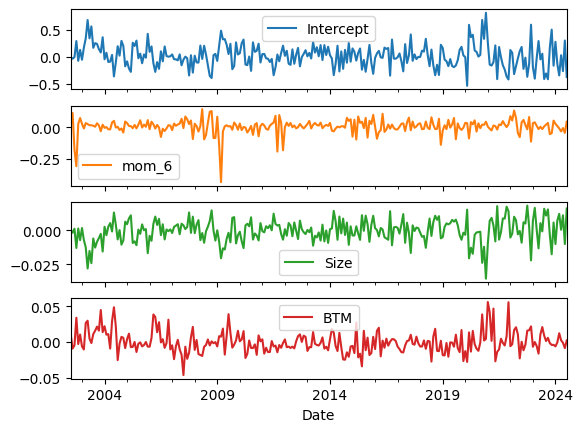

In [29]:
import statsmodels.formula.api as smf
import matplotlib.pylab as plt


risk_premiums = (
    df_regression.groupby(level = "Date").apply(
        lambda df_tmp: smf.ols(
            formula="ex_rt_shifted ~ mom_6 + Size + BTM",
            data = df_tmp
        ).fit().params  
    ).reset_index()
)


risk_premiums.set_index("Date").plot(subplots = True)
plt.show()

If we calculate t-statistics with and without the correction of heteroscedasticity and auto-correlation, the following results can be observed.

In [30]:
import numpy as np

price_of_risk = (risk_premiums
  .melt(id_vars="Date", var_name="factor", value_name="estimate")
  .groupby("factor")["estimate"]
  .apply(lambda x: pd.Series({
      "risk_premium": 100*x.mean(),
      "t_statistic": x.mean()/x.std()*np.sqrt(len(x))
    })
  )
  .reset_index()
  .pivot(index="factor", columns="level_1", values="estimate")
  .reset_index()
)

price_of_risk_newey_west = (risk_premiums
  .melt(id_vars="Date", var_name="factor", value_name="estimate")
  .groupby("factor")
  .apply(lambda x: (
      x["estimate"].mean()/ 
        smf.ols("estimate ~ 1", x)
        .fit(cov_type="HAC", cov_kwds={"maxlags": 6}).bse
    ), include_groups = False
  )
  .reset_index()
  .rename(columns={"Intercept": "t_statistic_newey_west"})
)

(price_of_risk
  .merge(price_of_risk_newey_west, on="factor")
  .round(3)
)

,factor,risk_premium,t_statistic,t_statistic_newey_west
0,BTM,0.022,0.231,0.169
1,Intercept,2.050,1.535,1.223
2,Size,-0.061,-1.176,-0.900
3,mom_6,0.389,1.099,1.189


This means that, we would not find any of the variables to have a significant impact on the asset return. However, signs of each variable is in line with empirical findings in the literature, i.e.:

* $\hat{\beta}^{Size} < 0$: Smaller companies have higher expected returns
* $\hat{\beta}^{BTM} > 0$: Values with higher book-to-market returns have higher expected returns
* $\hat{\beta}^{Mom} > 0$: Companies with a positive momentum have higher expected returns

The reason for the effects not being statistically different from zero may also be linked to the relative short time period which causes the number of months and estimates to be relatively small. If you are interested in this topic a great online book is available [here](https://www.tidy-finance.org/python/).

## Summary

Even though the linear regression model probably makes highly simplifying assumptions for reality in many cases, didactically it is a very good introduction to dependent variable modeling. We have looked at and discussed many details in more detail in this chapter, which we do retain for the upcoming models. However, it is true that many basic ideas, such as the mental distinction of the model and the estimation of the conditional expected value, exist in the same way for other and sometimes much more complex models. The most important aspects of this chapter for this course are:

* how is the model defined - from this it can be inferred what type of relationship is assumed between the dependent and independent variables
* how are the parameters of the model estimated - the use of a loss function that is minimized as the parameters change is very common for many different models
* what inferences can be made from the estimated model - how well can the model explain the data, what variables are important, what is their influence